# Teste de Estacionaridade

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Figura
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Criação da Série

In [3]:
# criando os dados
np.random.seed(10)
dados1 = np.random.normal(0, 1, 41)
dados1

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155])

In [4]:
# Criando o dataframe
dados1 = pd.DataFrame(dados1)
dados1.head()

,0
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


In [5]:
# Renomeando a coluns
dados1.columns = ['Valores']
dados1.head(3)

,Valores
0,1.331587
1,0.715279
2,-1.545400


In [6]:
# Shape
dados1.shape

(41, 1)

In [7]:
# Descrição
dados1.describe()

,Valores
count,41.000000
mean,0.183670
std,0.964847
min,-1.977728
25%,-0.337632
50%,0.195013
75%,0.715279
max,2.384967


In [8]:
# Criando o indice
indice = pd.date_range('1980', periods=len(dados1), freq='Y')
indice

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [9]:
# Criando a serie
serie1 = pd.Series(dados1['Valores'].values, index=indice)
serie1

1980-12-31    1.331587
1981-12-31    0.715279
1982-12-31   -1.545400
1983-12-31   -0.008384
1984-12-31    0.621336
1985-12-31   -0.720086
1986-12-31    0.265512
1987-12-31    0.108549
1988-12-31    0.004291
1989-12-31   -0.174600
1990-12-31    0.433026
1991-12-31    1.203037
1992-12-31   -0.965066
1993-12-31    1.028274
1994-12-31    0.228630
1995-12-31    0.445138
1996-12-31   -1.136602
1997-12-31    0.135137
1998-12-31    1.484537
1999-12-31   -1.079805
2000-12-31   -1.977728
2001-12-31   -1.743372
2002-12-31    0.266070
2003-12-31    2.384967
2004-12-31    1.123691
2005-12-31    1.672622
2006-12-31    0.099149
2007-12-31    1.397996
2008-12-31   -0.271248
2009-12-31    0.613204
2010-12-31   -0.267317
2011-12-31   -0.549309
2012-12-31    0.132708
2013-12-31   -0.476142
2014-12-31    1.308473
2015-12-31    0.195013
2016-12-31    0.400210
2017-12-31   -0.337632
2018-12-31    1.256472
2019-12-31   -0.731970
2020-12-31    0.660232
Freq: A-DEC, dtype: float64

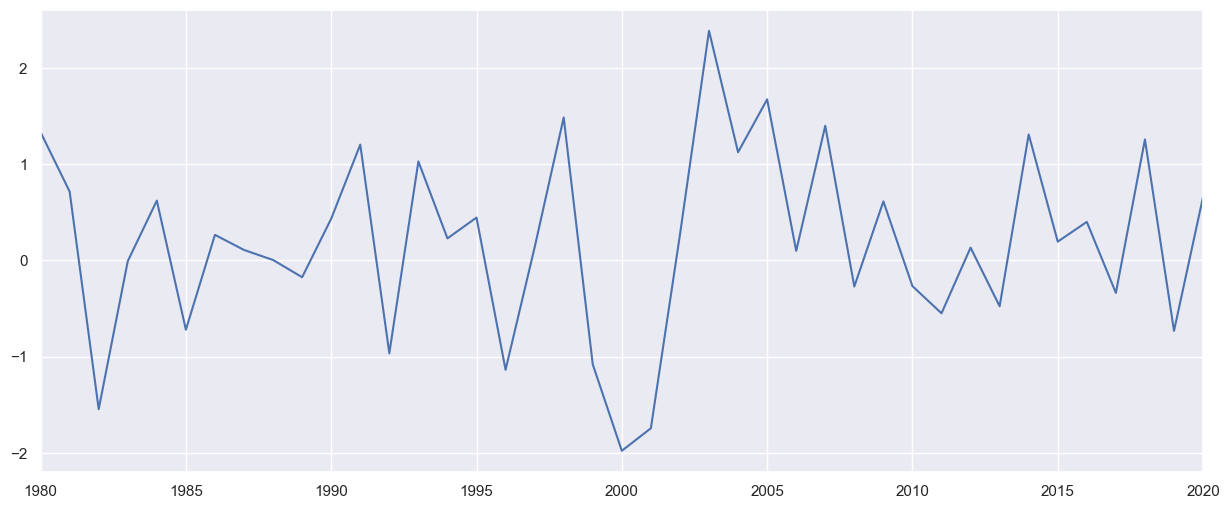

In [10]:
# Plot
serie1.plot();

# TESTE DE ESTACIONARIDADE

In [11]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

    Ho = Não estacionario: Estatistica do Teste > valor critico
    Ha = É Estationario: Estatistica do teste < valor critico

In [12]:
# teste
statsmodels.tsa.stattools.kpss(serie1)

C:\Users\franc\anaconda3\envs\Data-Science\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.0685962789581985,
 0.1,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [13]:
kpss = statsmodels.tsa.stattools.kpss(serie1)
print(f'Estatistica do teste: {kpss[0]:.4f}')
print(f'P-valor: {kpss[1]:.4f}')
print(f'Valores Criticos: ')
for chave, valor in kpss[3].items():
    print(f'{chave}: {valor:.4f}')

Estatistica do teste: 0.0686
P-valor: 0.1000
Valores Criticos: 
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\franc\anaconda3\envs\Data-Science\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**Teste df (Dickey Fuller)**

    Ho = Não e Estacionario: Estatistica do teste > valor critico
    Ha = E Estacionario: Estatistica do Teste < valor critico

In [14]:
df = statsmodels.tsa.stattools.adfuller(serie1)
print(f'Estatistica de Teste: {df[0]:.4f}')
print(f'P-valor: {df[1]:.4f}')
print(f'Valores Criticos: ')
for chave, valor in df[4].items():
    print(f'{chave}: {valor:.4f}')

Estatistica de Teste: -5.8642
P-valor: 0.0000
Valores Criticos: 
1%: -3.6056
5%: -2.9371
10%: -2.6070


# Dataset Importado

### **AirPassengers: Dados Classicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionas, 1949 a 1960**

In [15]:
# Importando a base de dados
serie2 = pd.read_csv("AirPassengers.csv")
serie2

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [16]:
# Criando a Serie
serie2 = pd.Series(serie2['#Passengers'].values, index=serie2['Month'])
serie2

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

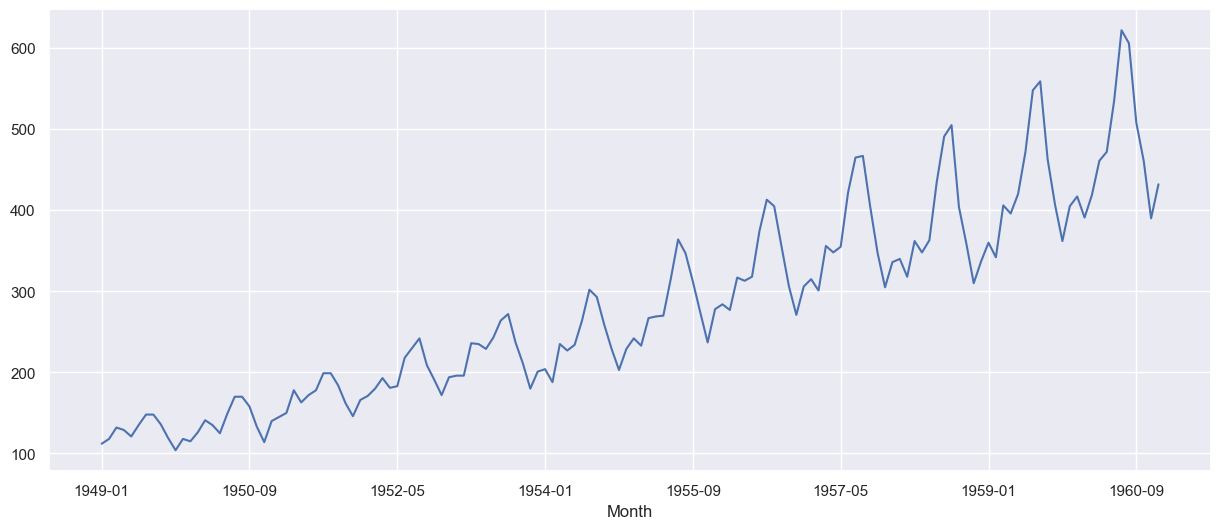

In [17]:
# Plot Grafico
serie2.plot();

# TESTE DE ESTACIONARIDADE

In [18]:
import statsmodels.tsa.stattools

**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

    Ho = Não estacionario: Estatistica do Teste > valor critico
    Ha = É Estationario: Estatistica do teste < valor critico

In [19]:
kpss2 = statsmodels.tsa.stattools.kpss(serie2, )
print(f'Estatistica do teste: {kpss[0]}')
print(f'P-valor: {kpss2[1]}')
print(f'Valores Criticos: ')
for chave, valor in kpss2[3].items():
    print(f'{chave}: {valor}')

Estatistica do teste: 0.0685962789581985
P-valor: 0.01
Valores Criticos: 
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


C:\Users\franc\anaconda3\envs\Data-Science\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


**Teste df (Dickey Fuller)**

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [20]:
df2 = statsmodels.tsa.stattools.adfuller(serie2)
print(f'Estatistica do teste: {df2[0]:.4f}')
print(f'P-valor: {df2[1]:.4f}')
print('Valores Criticos: ')

for chave, valor in df2[4].items():
    print(f'{chave}: {valor}')

Estatistica do teste: 0.8154
P-valor: 0.9919
Valores Criticos: 
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
